# Resaercher Evaluation - H-index

# 説明

## h-index（h指数）とは何か？

h-indexはアメリカの物理学者Jorge E. Hirsch氏が2005年に発表した研究者の評価指標である。

> 要旨：私は、研究者の科学的産出を特徴づける有用な指標として、被引用数がhより大きい論文の数と定義される指数hを提案した。
> 
>> Abstract: I propose the index h, defined as the number of papers with citation number ≥h, as a useful index to characterize the scientific output of a researcher. 
> 
> Hirsch, J. E. (2005). An index to quantify an individual's scientific research output. Proceedings of the National Academy of Sciences, 102(46), 16569-16572. https://www.pnas.org/doi/abs/10.1073/pnas.0507655102

ある科学者が発表したN本論文の中で、**h回以上引用された論文がh本あり**、それ以外のN-h本論文の被引用数が全部hより小さい場合、その科学者の**h-indexはh**である。
 
例えば、h-index=**20**というのは、被引用数が**20**以上の論文が**20**本あり、それ以外の論文はすべて被引用数が20本未満だということである。

## なぜ提案したのか？どうして重要なのか？

リソースが限られた世界で、個人の科学的成果の累積的影響力を定量化することは、評価や比較のために必要とされる。

|指数|長所|短所|
|:-|:-|:-|
|発表論文数(N)|研究者の生産力を測る|論文の影響力が無視される|
|総被引用数(C)|研究者の総影響力を測る|1. 少数の大ヒット論文に歪まれる可能性があり、特に、これらの大ヒットが共著である場合、個人のキャリア全体を代表していない可能性がある。<br>2. 引用度の高いレビューに過度な重みを与えている。|
|平均被引用数(C/N)|異なる年齢の科学者を比較することができる|1. 生産性が高い研究者に不利になる。2. 高被引用数の論文に歪まれる可能性がある。|
|被引用数≥cの論文数|上記の指標の欠点を克服し、広範囲かつ持続的な影響を測る。|cは任意であり、一部の科学者に有利な一方で他の科学者には不利になる。|
|上位q個の論文の被引用数|上記の指標の欠点をほとんど克服する。|1. 単一の数値ではないため、科学者を比較するには困難である。<br>2. qは任意であり、一部の科学者に有利な一方で他の科学者には不利になる。|


# 算出

## １. とある研究者Aのh-indexの計算方法

In [ ]:
#方法1 ドライブをマウントして、参照先一覧に追加
import sys
import os
from google.colab import drive

%cd /content/sample_data/
!git clone https://github.com/ScisciJP/scisciJP2024_tutorial.git

sys.path.append('/content/sample_data/scisciJP2024_tutorial')
print(os.getcwd())
os.chdir('/content/sample_data/scisciJP2024_tutorial')
sys.path

The h-index of the researcher is: 3


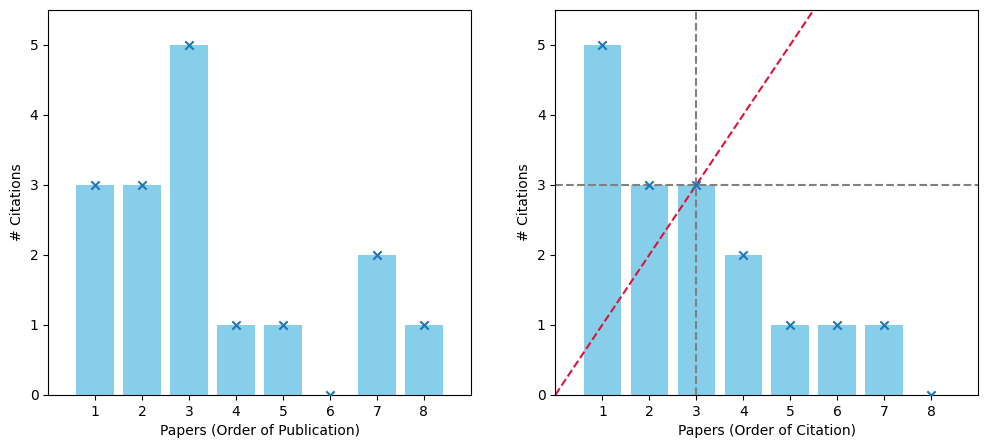

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_c_test(ax, citations, xlabel='Papers', ylabel='# Citations'):
    ax.bar(np.arange(1, len(citations) + 1), citations, color='skyblue')
    ax.scatter(np.arange(1, len(citations) + 1), citations, marker='x', zorder=5)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(1, len(citations) + 1, 1))
    ax.set_xlim(0, len(citations) + 1)
    ax.set_ylim(0, max(citations) * 1.1)

# とある研究者の論文の被引用数を入力
c_test = [3,3,5,1,1,0,2,1]

# 被引用数を大きい順に並べ替える
sorted_c_test = sorted(c_test,reverse=True)

# h-indexの算出
# メソッド１：被引用数が論文のランキングより大きい論文を数える。
h_index = np.sum([c >= i + 1 for i, c in enumerate(sorted_c_test)])

# メソッド２：図に示したように、論文被引用数の曲線と45°直線の交点の横座標がh-index。
array = np.arange(1,len(sorted_c_test)+1)
h_index = np.max(np.minimum(sorted_c_test, array))

print("The h-index of the researcher is:", h_index)

# Plot graphs
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plot_c_test(axs[0], c_test, 'Papers (Order of Publication)', '# Citations')
plot_c_test(axs[1], sorted_c_test, 'Papers (Order of Citation)', '# Citations')
axs[1].plot([0, 10], [0, 10], ls="--", color='crimson')
axs[1].plot([0, axs[1].get_xlim()[1]], [h_index, h_index], color='gray', linestyle='--')
axs[1].plot([h_index, h_index], [0, axs[1].get_ylim()[1]], color='gray', linestyle='--')
plt.show()

## 2. 実データからh-indexの算出

In [ ]:
%pip install pyalex

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
from pyalex import Works, Authors, Institutions
import matplotlib.pyplot as plt
import pyalex
import requests
from pprint import pprint
import util

# pyalex.config.email = "your@email.address"
pyalex.config.email = "wangsiyuan1209@gmail.com"

def calculate_h_index(citations):
    citations = np.array(citations)
    citations[::-1].sort()
    array = np.arange(1,citations.size+1)
    h_index = np.max(np.minimum(citations, array))
    return h_index

def plot_citations(ax, citations,*, h_index=0, title='h-index', xlabel='Papers', ylabel='# Citations', loglog=True):
    ax.plot(np.arange(1, len(citations) + 1), citations, marker='o', linestyle='None')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(1, len(citations) + 1, 1))
    if loglog:
        ax.set_yscale('log')  # Set y-axis to log scale
        ax.set_xscale('log')  # Set x-axis to log scale
    lim=min(ax.get_xlim()[1],ax.get_ylim()[1])
    ax.plot([0, lim], [0, lim], ls="--", color='crimson')
    if h_index!=0:
        ax.plot([0, ax.get_xlim()[1]], [h_index, h_index], color='gray', linestyle='--')
        ax.plot([h_index, h_index], [0, ax.get_ylim()[1]], color='gray', linestyle='--')
        plt.show()

In [ ]:
# アインシュタインを検索する
authors_json = Authors().search_filter(display_name="albert einstein")\
            .select(["id","display_name","relevance_score","works_count","cited_by_count","summary_stats"]).get()
authors_pd = pd.DataFrame(authors_json)
# display(authors_pd)
author_id = authors_pd.loc[0,"id"]
author_name = authors_pd.loc[0,"display_name"]
# data = Authors()[author_id]
# display(pd.Series(data)) # 著者データ。

In [ ]:
pager = Works().filter(author={"id":author_id},is_paratext=False)\
                .sort(cited_by_count="desc")\
                .paginate(per_page=200)
citations = []
for page in pager:
    for item in page:
        citations.append(item["cited_by_count"])

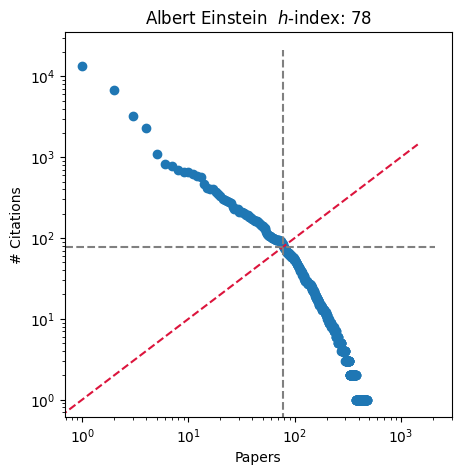

In [ ]:
citations=np.array(citations)
citations[::-1].sort()
h_index = calculate_h_index(citations)

fig, ax = plt.subplots(figsize=(5, 5))
title = f'{author_name}  $h$-index: {h_index}'
plot_citations(ax, citations, h_index=h_index, title=title, loglog=True)
plt.show()

# 探索

## １．重回帰分析によるh-index予測

2010年時点のデータに基づいて2020年の予測(filter(cited_count>10))
- X：
    - gender: {0:'male',1:'female'} get from 'display_name' by namsor api 
    - career_age: 2024 - min(publication_year)
    - num_citation_past_5_years: get from 'counts_by_year'
    - country: (one-hot vector 0001 1000)?
    - affiliation_h_index: institution.summary_stats.h_index
    - affiliation_works_count: institution.works_count
    - affiliation_level: leiden ranking
- Y:
    - h_index: 'author.summary_stats.h_index'

In [ ]:
from sklearn.linear_model import LinearRegression

学習データの準備

In [ ]:
# Sample author of cited_by_count>10 as training data
authors = Authors().sample(1000, seed=42)\
                .filter(cited_by_count=">10")\
                .filter(works_count=">3")\
                .select(['id','display_name','summary_stats','affiliations','last_known_institution','counts_by_year'])
author_json = util.getAll(authors)
# pprint(author_json)
author_training_df = pd.DataFrame(author_json)
# display(author_training_df)

1it [00:01,  1.62s/it]


In [ ]:
display(author_training_df)

,id,display_name,summary_stats,affiliations,last_known_institution,counts_by_year
0,https://openalex.org/A5040615650,Lydia Kernitsky,"{'2yr_mean_citedness': 0.0, 'h_index': 4, 'i10...",[{'institution': {'id': 'https://openalex.org/...,"{'id': 'https://openalex.org/I72019824', 'ror'...","[{'year': 2024, 'works_count': 0, 'cited_by_co..."
1,https://openalex.org/A5073704210,S. Khomiakov,"{'2yr_mean_citedness': 0.0, 'h_index': 6, 'i10...",[{'institution': {'id': 'https://openalex.org/...,"{'id': 'https://openalex.org/I4210136839', 'ro...","[{'year': 2024, 'works_count': 0, 'cited_by_co..."
2,https://openalex.org/A5080685676,Daniel J. O’Connell,"{'2yr_mean_citedness': 22.875, 'h_index': 33, ...",[{'institution': {'id': 'https://openalex.org/...,"{'id': 'https://openalex.org/I179193067', 'ror...","[{'year': 2024, 'works_count': 1, 'cited_by_co..."
3,https://openalex.org/A5001317537,Mamadou Diop,"{'2yr_mean_citedness': 4.0, 'h_index': 3, 'i10...",[{'institution': {'id': 'https://openalex.org/...,"{'id': 'https://openalex.org/I4210117989', 'ro...","[{'year': 2023, 'works_count': 0, 'cited_by_co..."
4,https://openalex.org/A5070058857,Fariborz Ehteshami,"{'2yr_mean_citedness': 3.0, 'h_index': 4, 'i10...",[{'institution': {'id': 'https://openalex.org/...,"{'id': 'https://openalex.org/I4210141426', 'ro...","[{'year': 2024, 'works_count': 0, 'cited_by_co..."
...,...,...,...,...,...,...
195,https://openalex.org/A5040007905,N. A. Kostrikina,"{'2yr_mean_citedness': 2.3333333333333335, 'h_...",[{'institution': {'id': 'https://openalex.org/...,"{'id': 'https://openalex.org/I1313323035', 'ro...","[{'year': 2024, 'works_count': 0, 'cited_by_co..."
196,https://openalex.org/A5068757203,Y.-B. Kim,"{'2yr_mean_citedness': 0.0, 'h_index': 2, 'i10...",[{'institution': {'id': 'https://openalex.org/...,"{'id': 'https://openalex.org/I4210093716', 'ro...","[{'year': 2024, 'works_count': 1, 'cited_by_co..."
197,https://openalex.org/A5025454730,Li-Yun Hu,"{'2yr_mean_citedness': 2.55, 'h_index': 25, 'i...",[{'institution': {'id': 'https://openalex.org/...,"{'id': 'https://openalex.org/I53592917', 'ror'...","[{'year': 2024, 'works_count': 0, 'cited_by_co..."
198,https://openalex.org/A5016865163,Chris Ainscough,"{'2yr_mean_citedness': 0.0, 'h_index': 6, 'i10...",[{'institution': {'id': 'https://openalex.org/...,"{'id': 'https://openalex.org/I1297288678', 'ro...","[{'year': 2023, 'works_count': 0, 'cited_by_co..."


In [ ]:
# Get h_index
author_training_df['h_index'] = author_training_df['summary_stats'].apply(lambda x:x['h_index'])

In [ ]:
author_training_df[['career_age','c_past_5years','affiliation_h_index']]=0 #'gender','c_first_5years'
author_training_df[['c_is_valid','affiliation_is_valid']] = False
predictor_year = 2016
time_span = 5

for i, author in author_training_df.iterrows():
    # Calculate career_age
    works = Works().filter(author={"id":author["id"]}).sort(publication_year="asc").get() #***API***
    first_publication_year = works[0]["publication_year"]   
    author_training_df.loc[i,'career_age'] = 2024 - first_publication_year

    if first_publication_year > (predictor_year - time_span + 1):
        continue
        
    # Calculate c_first_5years (total citation of papers published in the first 5 years of the career)
    # works = Works().filter(author={"id":author["id"]})\
    #             .filter(from_publication_date=f'{first_publication_year}-01-01')\
    #             .filter(to_publication_date=f'{first_publication_year + time_span - 1}-12-31')
    # works = util.getAll(works) #***API***
    # c_first_5years = 0
    # for work in works:
    #     c_first_5years += work["cited_by_count"]
    # author_training_df.loc[i,'c_first_5years'] = c_first_5years
    
    # Calculate c_past_5years (citation earned in the past 5 years [predictor_year-2, predictor_year-1, predictor_year])
    c_past_5years = 0
    for entry in author['counts_by_year']:
        if (predictor_year - time_span + 1) <= entry['year'] <= predictor_year:
            c_past_5years += entry['cited_by_count']
    author_training_df.loc[i,'c_past_5years'] = c_past_5years
    
    # Verify whether c_first_5years/c_past_5years is valid (first paper is published before/in (predictor_year-4))
    author_training_df.loc[i,'c_is_valid'] = first_publication_year <= (predictor_year - time_span + 1)
    
    # Calculate affiliation_h_index (h-index of last_known_institution)
    # af = author["last_known_institution"]
    # affiliation_h_index = Institutions()[af['id']]['summary_stats']['h_index'] #***API***
    # author_training_df.loc[i,'affiliation_h_index'] = affiliation_h_index
    
    # Calculate affiliation_h_index (h-index of affiliations the author belongs to in 'predictor_year')
    affiliations = author["affiliations"]
    found = False
    year = predictor_year
    while (not found) and (year > predictor_year-10):
        for af in affiliations:
            if predictor_year in af['years']:
                affiliation_h_index = Institutions()[af['institution']['id']]['summary_stats']['h_index'] #***API***
                if author_training_df.loc[i,'affiliation_h_index'] < affiliation_h_index:
                    author_training_df.loc[i,'affiliation_h_index'] = affiliation_h_index
                found = True
        year -= 1
    author_training_df.loc[i,'affiliation_is_valid'] = found

    if (i+1)%10==0: 
        print(i+1)

20
40
60
70
80
90
110
130
140
150
160
170
180
190
200


In [ ]:
display(author_training_df)

,id,display_name,summary_stats,affiliations,last_known_institution,counts_by_year,h_index,career_age,c_past_5years,affiliation_h_index,c_is_valid,affiliation_is_valid
0,https://openalex.org/A5040615650,Lydia Kernitsky,"{'2yr_mean_citedness': 0.0, 'h_index': 4, 'i10...",[{'institution': {'id': 'https://openalex.org/...,"{'id': 'https://openalex.org/I72019824', 'ror'...","[{'year': 2024, 'works_count': 0, 'cited_by_co...",4,19,83,0,True,False
1,https://openalex.org/A5073704210,S. Khomiakov,"{'2yr_mean_citedness': 0.0, 'h_index': 6, 'i10...",[{'institution': {'id': 'https://openalex.org/...,"{'id': 'https://openalex.org/I4210136839', 'ro...","[{'year': 2024, 'works_count': 0, 'cited_by_co...",6,12,54,22,True,True
2,https://openalex.org/A5080685676,Daniel J. O’Connell,"{'2yr_mean_citedness': 22.875, 'h_index': 33, ...",[{'institution': {'id': 'https://openalex.org/...,"{'id': 'https://openalex.org/I179193067', 'ror...","[{'year': 2024, 'works_count': 1, 'cited_by_co...",33,96,1131,662,True,True
3,https://openalex.org/A5001317537,Mamadou Diop,"{'2yr_mean_citedness': 4.0, 'h_index': 3, 'i10...",[{'institution': {'id': 'https://openalex.org/...,"{'id': 'https://openalex.org/I4210117989', 'ro...","[{'year': 2023, 'works_count': 0, 'cited_by_co...",3,10,0,0,False,False
4,https://openalex.org/A5070058857,Fariborz Ehteshami,"{'2yr_mean_citedness': 3.0, 'h_index': 4, 'i10...",[{'institution': {'id': 'https://openalex.org/...,"{'id': 'https://openalex.org/I4210141426', 'ro...","[{'year': 2024, 'works_count': 0, 'cited_by_co...",4,19,27,246,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
195,https://openalex.org/A5040007905,N. A. Kostrikina,"{'2yr_mean_citedness': 2.3333333333333335, 'h_...",[{'institution': {'id': 'https://openalex.org/...,"{'id': 'https://openalex.org/I1313323035', 'ro...","[{'year': 2024, 'works_count': 0, 'cited_by_co...",38,43,1020,0,True,False
196,https://openalex.org/A5068757203,Y.-B. Kim,"{'2yr_mean_citedness': 0.0, 'h_index': 2, 'i10...",[{'institution': {'id': 'https://openalex.org/...,"{'id': 'https://openalex.org/I4210093716', 'ro...","[{'year': 2024, 'works_count': 1, 'cited_by_co...",2,21,95,0,True,False
197,https://openalex.org/A5025454730,Li-Yun Hu,"{'2yr_mean_citedness': 2.55, 'h_index': 25, 'i...",[{'institution': {'id': 'https://openalex.org/...,"{'id': 'https://openalex.org/I53592917', 'ror'...","[{'year': 2024, 'works_count': 0, 'cited_by_co...",25,21,1015,578,True,True
198,https://openalex.org/A5016865163,Chris Ainscough,"{'2yr_mean_citedness': 0.0, 'h_index': 6, 'i10...",[{'institution': {'id': 'https://openalex.org/...,"{'id': 'https://openalex.org/I1297288678', 'ro...","[{'year': 2023, 'works_count': 0, 'cited_by_co...",6,13,28,353,True,True


In [ ]:
pd.reset_option('display.max_rows')

In [ ]:
backup=author_training_df.copy()

In [ ]:
author_training_valid=author_training_df[(author_training_df['c_is_valid']==True)&(author_training_df['affiliation_is_valid']==True)]

In [ ]:
author_training_valid.shape

(57, 12)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define X and y of multiple regression analysis
X = author_training_valid[['career_age','c_past_5years','affiliation_h_index']]  # predictors
y = author_training_valid['h_index']  # target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

# Fitting
model.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = model.predict(X_train)

# Predictions on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model using R^2 score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training set R^2 score:", train_r2)
print("Testing set R^2 score:", test_r2)

Training set R^2 score: 0.8135047936381444
Testing set R^2 score: 0.31457597155546313


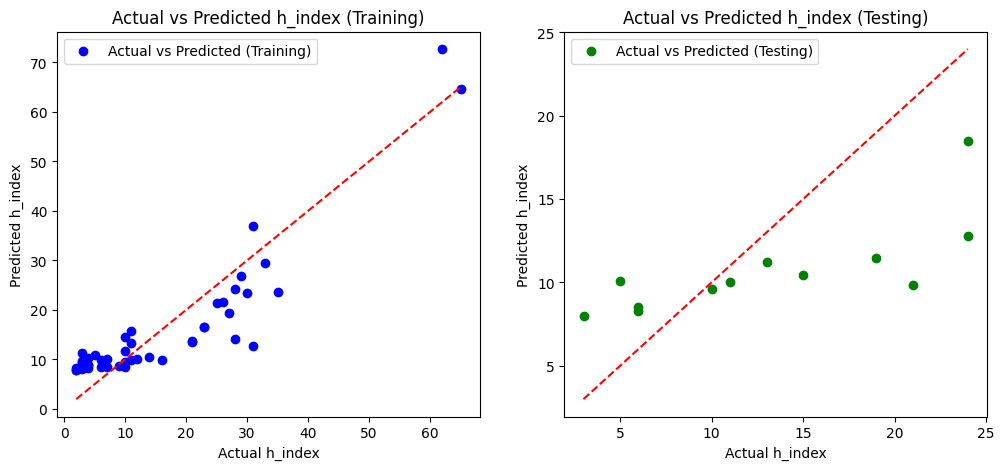

In [ ]:
import matplotlib.pyplot as plt

def plot_evaluation(ax, y, y_pred, *, type='', color='blue'):
    ax.scatter(y, y_pred, color=color, label=f'Actual vs Predicted ({type})')
    ax.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
    ax.set_xlabel('Actual h_index')
    ax.set_ylabel('Predicted h_index')
    ax.set_title(f'Actual vs Predicted h_index ({type})')
    ax.legend()
    
# Plotting actual vs predicted values for the training set
fig, axs = plt.subplots(1,2,figsize=(12,5))
plot_evaluation(axs[0], y_train, y_train_pred, type='Training',color='blue')
plot_evaluation(axs[1], y_test, y_test_pred, type='Testing',color='green')
plt.show()